## **Smart Mobility and Traffic Flow Optimization in Austin Using IoT Bluetooth Sensors**

By Team A04

Team members: Sambisha Godi, Li-Hsin Chang, Margaret Croghan, Steven Marathias, Tanish Puneeth

**Data Source**

1. Bluetooth Travel Sensors – Individual Traffic Match Files (ITMF): City of Austin Data Portal [Link](https://data.austintexas.gov/Transportation-and-Mobility/Bluetooth-Travel-Sensors-Individual-Traffic-Match-/x44q-icha/about_data). This dataset includes information on Bluetooth device detections with timestamps and location details at various roadway sensors in Austin.
Data Size: ~14.0 GB | Rows: ~103 M | Columns: 11

2. Bluetooth Travel Sensors – Traffic Match Summary Records (TMSR): City of Austin Data Portal [Link](https://data.austintexas.gov/Transportation-and-Mobility/Bluetooth-Travel-Sensors-Traffic-Match-Summary-Rec/v7zg-5jg9/about_data). This dataset includes aggregated summaries of travel times and average speeds across sensor-equipped roadway segments in 15-minute intervals.
Data Size: ~11.4 GB | Rows: ~61.9 M | Columns: 16

**License**

License Type: Public Domain

Attribution: Data provided by the City of Austin, Texas – data.austintexas.gov

Usage: The data may be freely used, modified, and shared for any purpose, including academic, research, and commercial purposes.

Notes: The datasets contain anonymized data; no personally identifiable information (PII) is included.

# Table of Contents

- Executive Summary  
- Problem Statement  
- Introduction & Motivation
- Tableau Dashboards  

- Data Preparation  
  - 1. Storyline & Data Cleaning  
    - 1.1 Extracting and Understanding the Datasets  
    - 1.2 Cleaning the First Dataset (TMF)  
    - 1.3 Cleaning the Second Dataset (TMSR)  
    - 1.4 Merging the Datasets and Handling Overlaps  

- Analysis
  - 2. Traffic Volume, Coverage, and Patterns  
    - 2.1 Overall Trip Counts and Sensor Coverage  
    - 2.2 Temporal Patterns (Hourly / Daily / Weekly)  
    - 2.3 Spatial Distribution of Segments and Routes  
    - 2.4 Summary  
  - 3. Congestion and Travel Time Insights  
    - 3.1 Peak-Hour Travel Times  
    - 3.2 Origin–Destination Bottlenecks  
    - 3.3 Corridor-Level Comparisons  
    - 3.4 Summary  

- 4. Challenges  
- 5. References  
- 6. Generative AI Disclosure


**Problem Definition:**
This project aims to analyze traffic flow efficiency and congestion patterns in Austin using Bluetooth travel sensor data, providing insights into roadway performance and mobility challenges in urban environments.

We will:

Identify roadway segments and intersections with highest traffic density and slowest average speeds.

Compare travel times and speeds across different hours of the day and days of the week to detect congestion trends.

Examine origin-destination (O–D) movement patterns, including most common origins, destinations, and asymmetric routes.

Evaluate the relationship between segment length and average speed to identify potential bottlenecks and support smart mobility solutions.

##### **Motivation**
Urban congestion remains one of the most pressing challenges for modern cities, impacting travel reliability, economic productivity, and quality of life. Austin’s Bluetooth sensor network provides a unique opportunity to measure traffic flow in real time and uncover hidden inefficiencies across roadway segments. By analyzing these large-scale datasets and visualizing the results in Tableau, our project aims to transform raw sensor data into actionable insights. The motivation is to support smarter mobility decisions, highlight critical bottlenecks, and ultimately contribute to building a more efficient and resilient transportation system.


## **Entity Relationship Diagram**

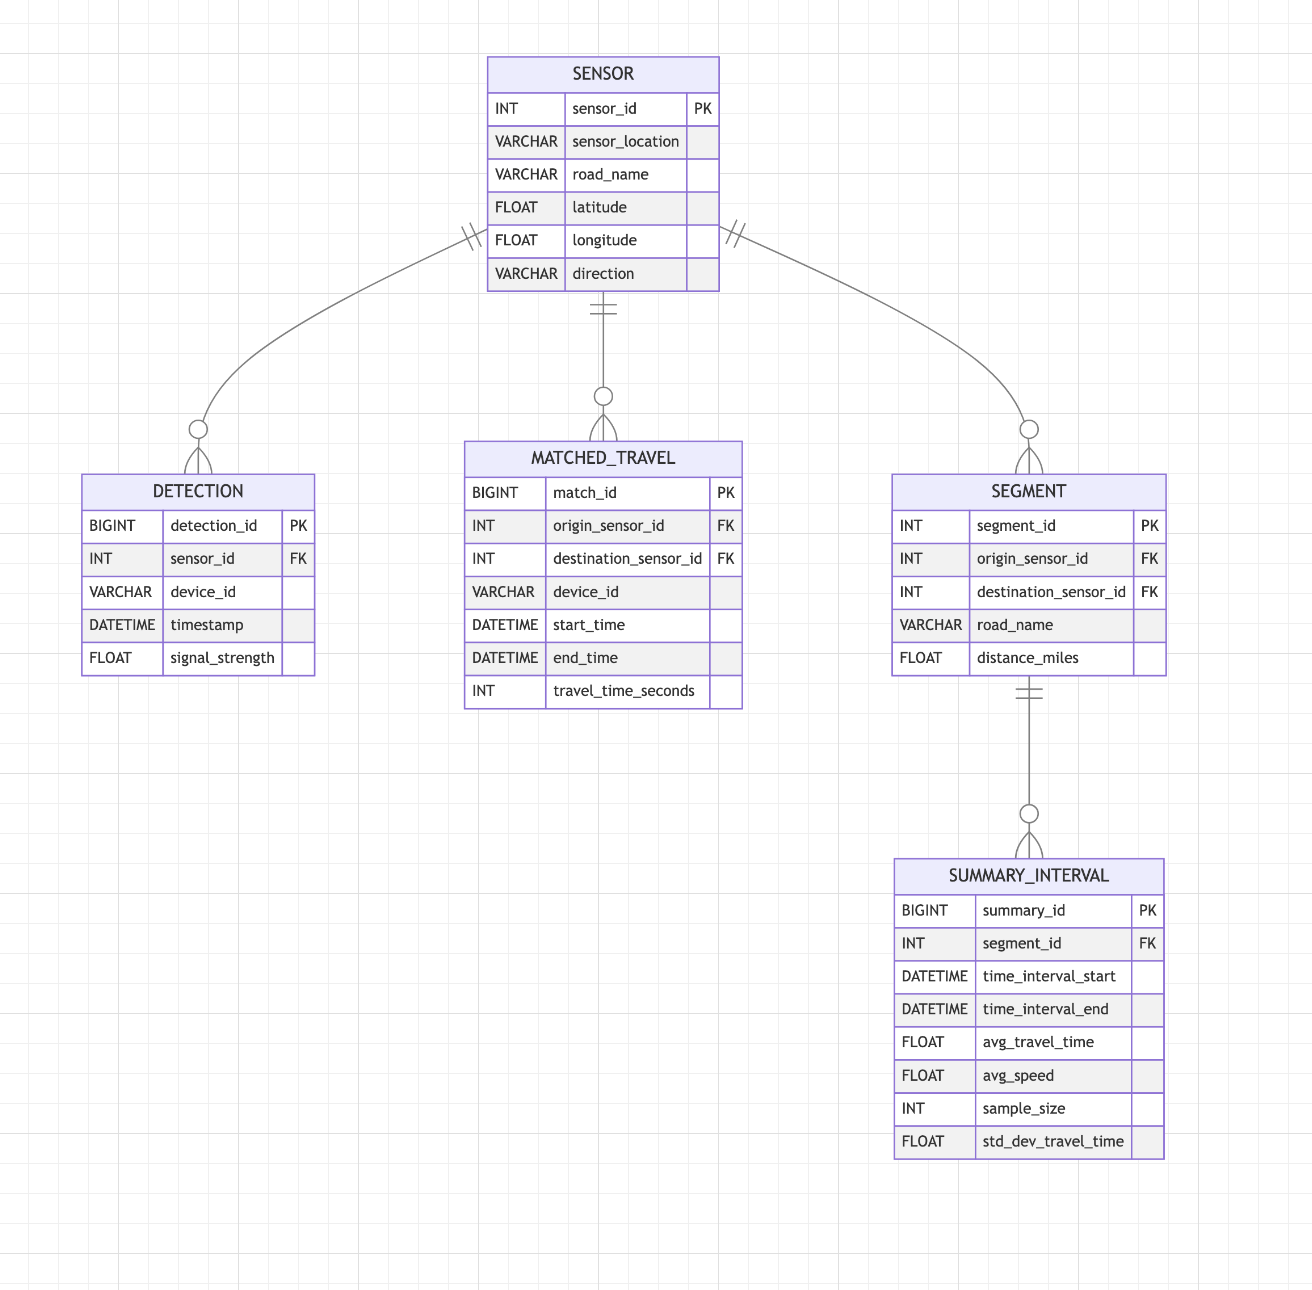

## **Executive Summary**

This project analyzes Austin’s smart mobility sensor data to understand congestion patterns, segment performance, and travel-time reliability across the city’s transportation network. Using matched travel data and 15-minute aggregated segment summaries, we examined delay trends, identified peak-time bottlenecks, predicted high-risk delays, and measured how long each segment takes to return to free-flow speeds. Our key findings show that urban segments in Austin are consistently the slowest, short segments (<0.5 miles) are disproportionately affected by congestion, and several critical corridors experience extended recovery times after peak traffic. Based on these insights, we recommend targeting improvements on the worst-performing segments, using predictive delay signals for proactive traffic management, and enhancing sensor coverage in areas with high variability to support more reliable and efficient mobility across Austin.

## **Tableau Dashboards**

Tableau Public Link (Dashboard 1): https://public.tableau.com/app/profile/maggie.croghan/viz/Team4-FinalDashboard1/CongestionPatternsandSegmentPerformanceDashboard?publish=yes

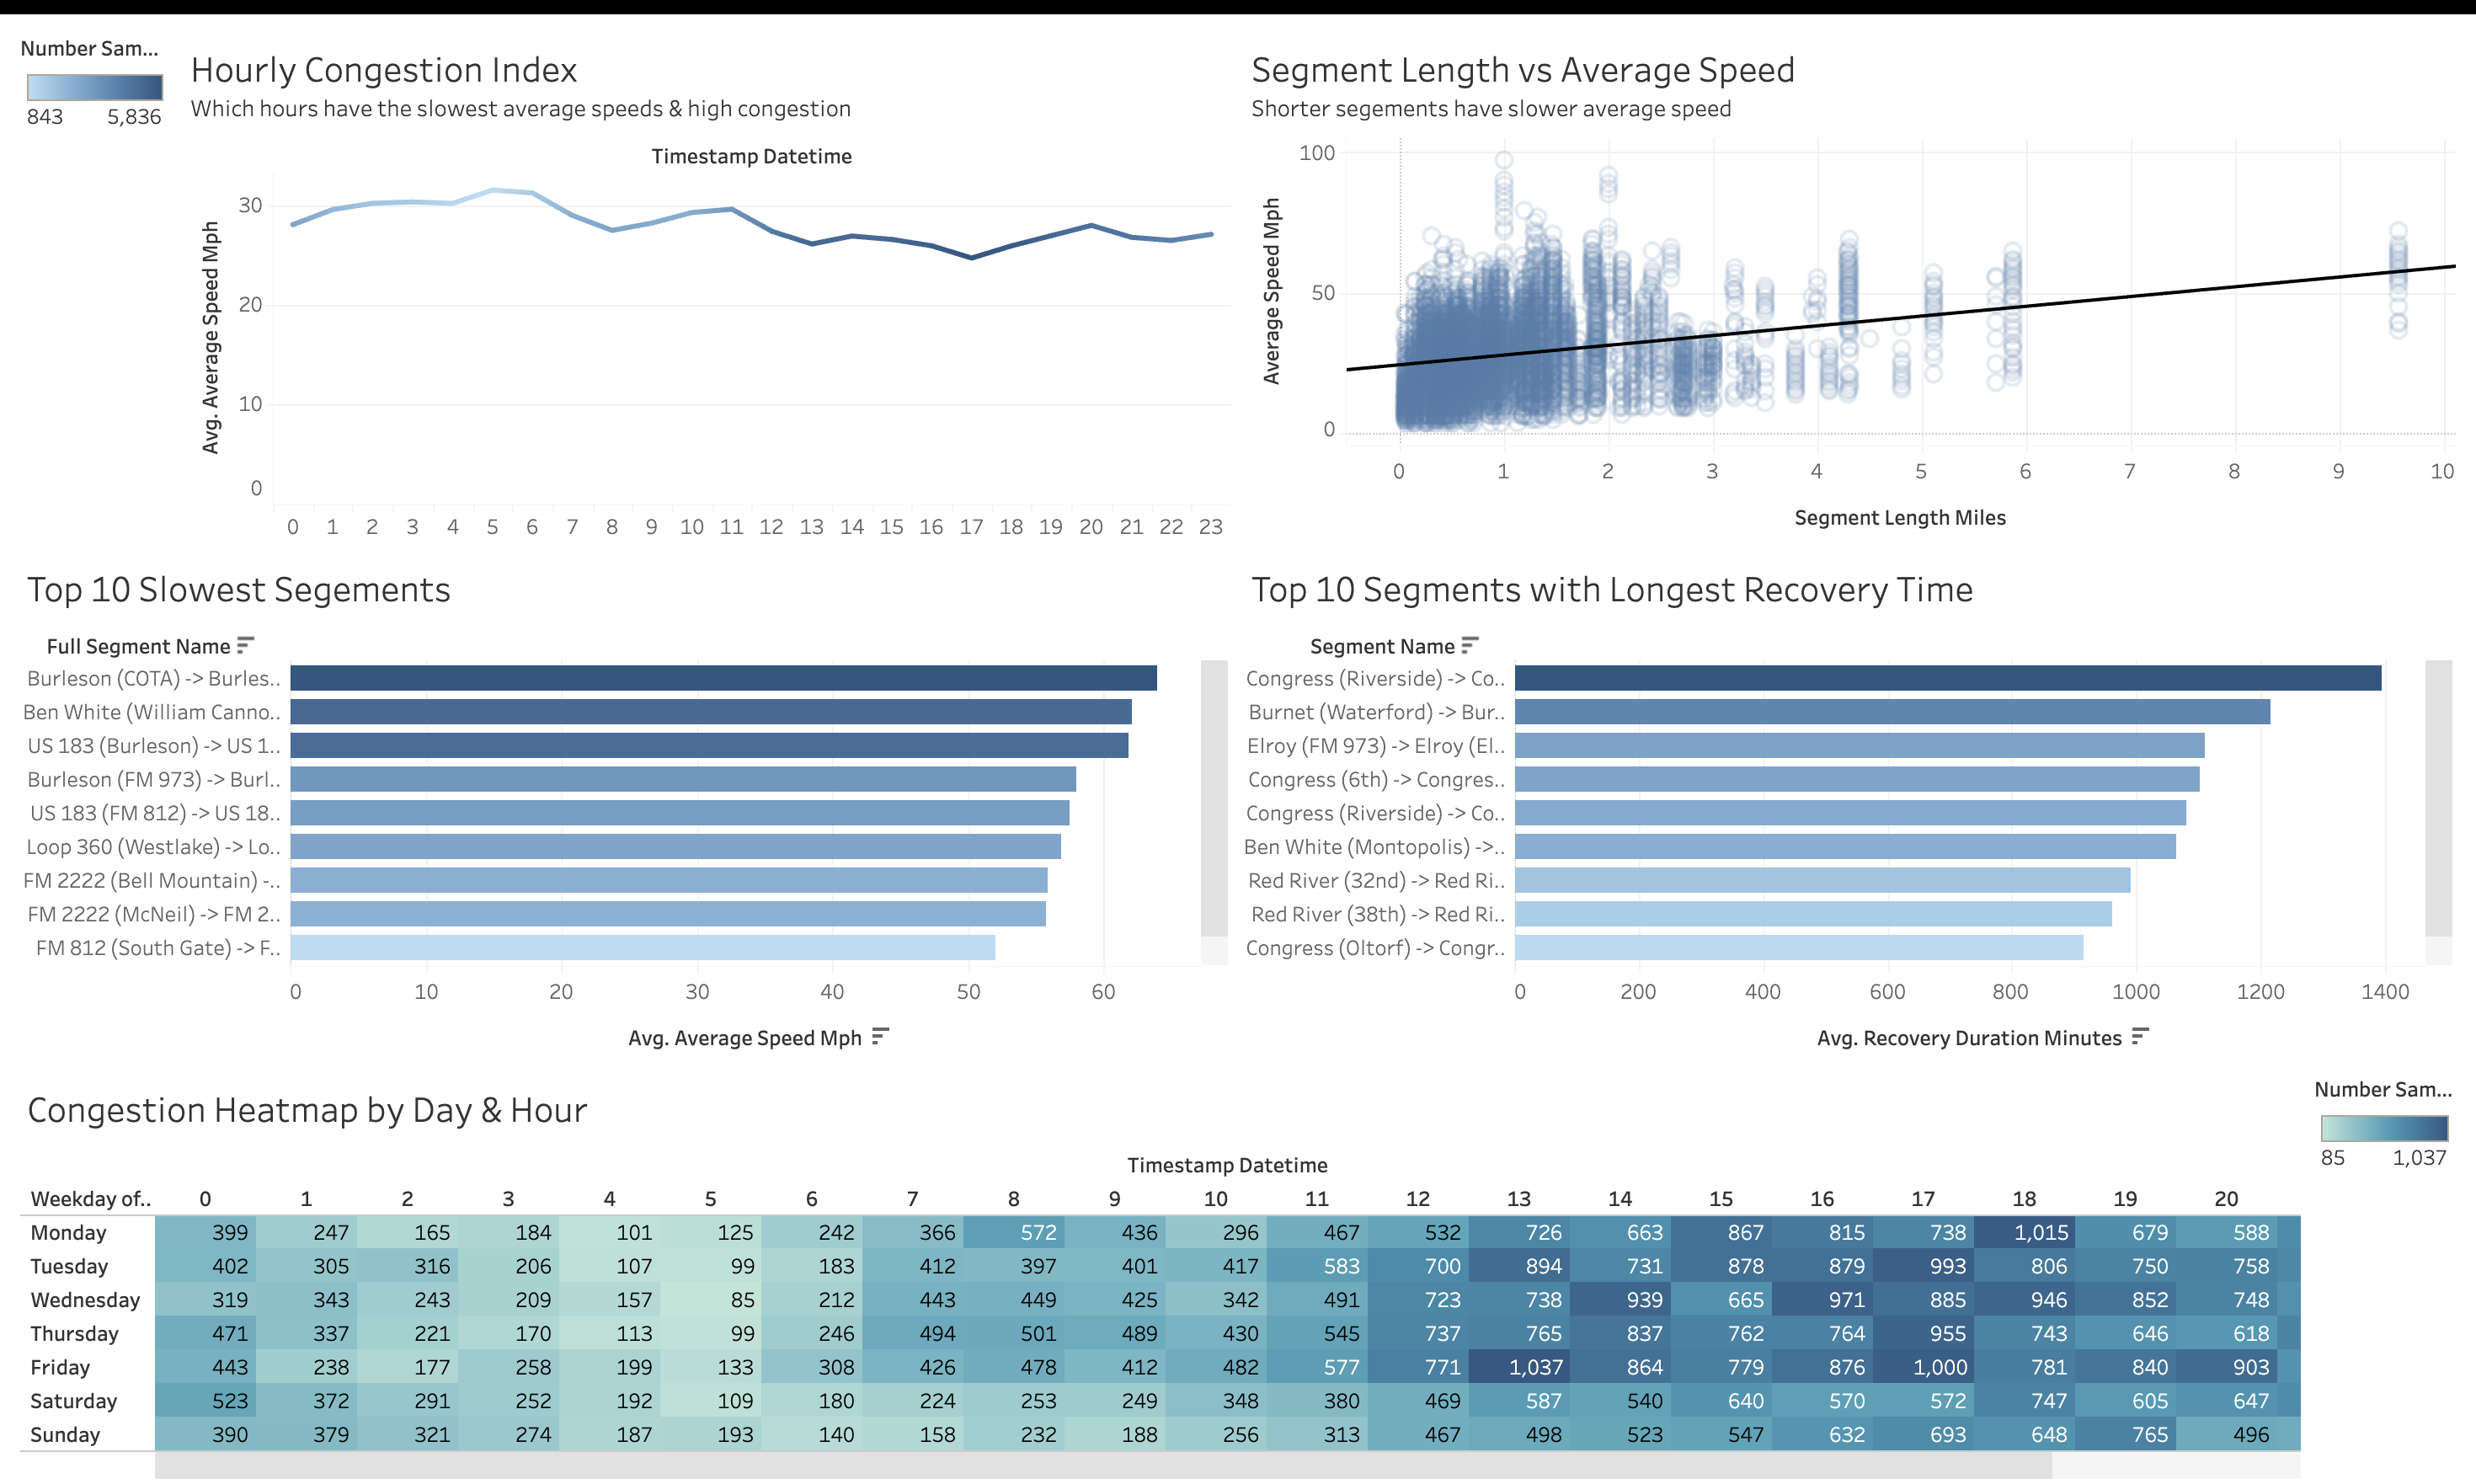

Tableau Public Link (Dashboard 2):https://public.tableau.com/views/dashboard2_17652280043810/Dashboard2?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

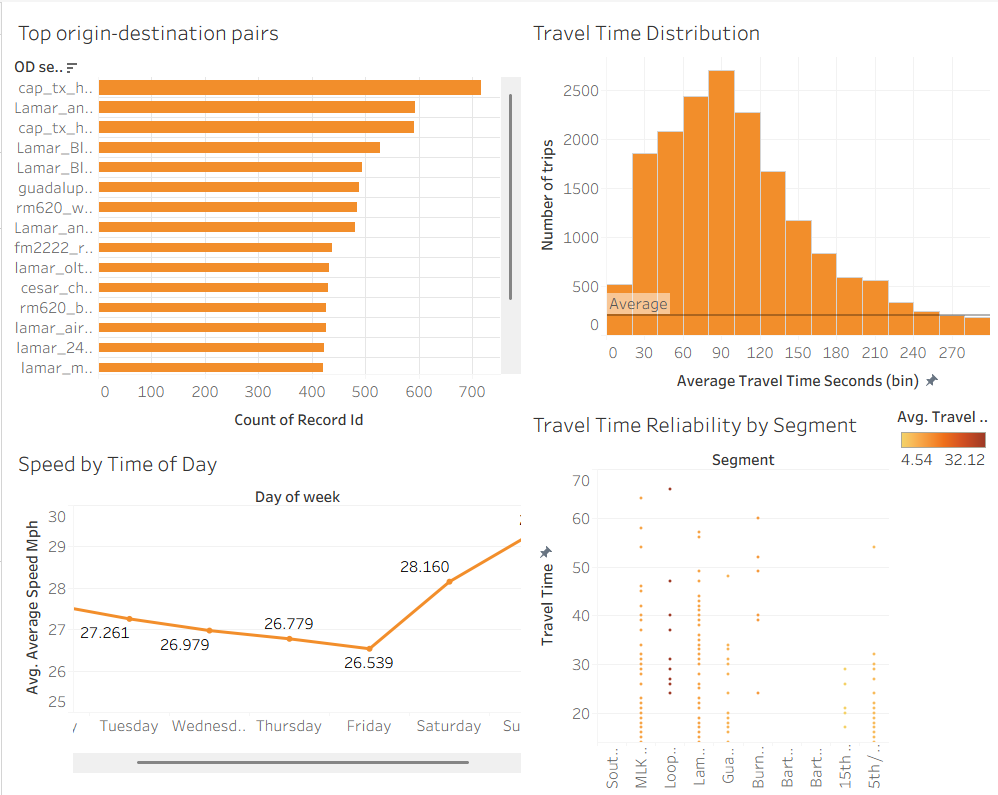

## **Data Cleaning**

We filtered the ITMF dataset to include only valid matches (match_validity = 'valid') with realistic travel times and speeds, standardized origin/destination identifiers, removed duplicates, and ensured proper timestamp formatting. This preprocessing ensures reliable aggregation and analysis for traffic flow and congestion patterns.

In [ ]:
%%bigquery
-- Preview ITMF sample (first 10 rows)
SELECT *
FROM `ba775-team-4-project.smart_mobility.itmf_sample`
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,record_id,device_address,origin_reeder_identifier,destination_reeder_identifier,travel_time_seconds,speed_miles_per_hour,match_validity,filter_identifier,start_time,end_time,day_of_week
0,90f809be48f904161694e8e2b5ea860d,10933,51st_manor,51st_mueller,1141.0,4.0,invalid,125,2021-11-06 18:59:23+00:00,2021-11-06 19:18:24+00:00,Saturday
1,7b73fc2b0628b6b7f105cfc4d5f2cb31,39697,51st_manor,51st_mueller,948.0,4.0,invalid,125,2017-07-07 20:26:11+00:00,2017-07-07 20:41:59+00:00,Friday
2,9cce08b9cd6b96bdcf60fd3337ba4d25,46800,51st_manor,51st_mueller,918.0,4.0,invalid,125,2017-11-27 14:19:07+00:00,2017-11-27 14:34:25+00:00,Monday
3,153b7d4ad4375b82f89d42d8b126e8a2,f2:a5:f2:6c:b9,51st_mueller,51st_manor,1047.0,4.0,valid,125,2016-07-13 20:11:22+00:00,2016-07-13 20:28:48+00:00,Wednesday
4,260d8c6b8fdabd199f105b18b27bf097,3339,51st_mueller,51st_manor,1093.0,4.0,invalid,125,2020-10-30 09:20:20+00:00,2020-10-30 09:38:33+00:00,Friday
5,5c53489961e61ced0af5b450c0451afb,bf:67:86:98:10,51st_mueller,51st_manor,1088.0,4.0,invalid,125,2016-11-02 18:04:06+00:00,2016-11-02 18:22:15+00:00,Wednesday
6,7c2eeb47b78d37f81477f5a9daf11163,27134,51st_springdale,springdale_mlk,609.0,4.0,invalid,125,2018-06-13 17:55:38+00:00,2018-06-13 18:05:47+00:00,Wednesday
7,e5626f9748ce64d01dfa48e624f2c3ae,3854,51st_springdale,springdale_manor,1039.0,4.0,invalid,125,2021-02-28 12:28:07+00:00,2021-02-28 12:45:26+00:00,Sunday
8,6b9688ee9571ec12c38ca8b66a85d388,29380,51st_springdale,51st_manor,577.0,4.0,invalid,125,2017-12-12 19:48:31+00:00,2017-12-12 19:58:09+00:00,Tuesday
9,173df7ff8ac08cffa44f9bc29842edb5,50:f4:73:25:51,51st_springdale,51st_manor,586.0,4.0,invalid,125,2016-10-07 02:37:02+00:00,2016-10-07 02:46:48+00:00,Thursday


We preview the TMSR dataset to inspect its structure, columns, and sample values before performing data cleaning and aggregation. This helps ensure proper understanding of travel time and speed summaries across sensor-equipped roadway segments.

In [ ]:
%%bigquery
-- Preview TMSR sample (first 10 rows)
SELECT *
FROM `ba775-team-4-project.smart_mobility.tmsr_sample`
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,record_id,origin_reader_identifier,destination_reader_identifier,origin_roadway,origin_cross_street,origin_direction,destination_roadway,destination_cross_street,destination_direction,segment_length_miles,timestamp,average_travel_time_seconds,average_speed_mph,summary_interval_minutes,number_samples,standard_deviation
0,dcb3ded3b13dd835b3940cbf0c51d2f7,51st_manor,51st_springdale,51st,Manor,Eastbound,51st,Springdale,Westbound,0.633,2018 Sep 23 11:15:00 AM,63,36,15,1,0.00
1,146318670051st_manor51st_springdale,51st_manor,51st_springdale,51st,Manor,Eastbound,51st,Springdale,Westbound,0.633,2016 May 14 12:45:00 AM,75,30,15,9,4.87
2,33e95dce51313c65ec0d79732a1bc090,51st_manor,51st_springdale,51st,Manor,Eastbound,51st,Springdale,Westbound,0.633,2018 Oct 08 12:00:00 PM,63,36,15,1,0.00
3,145845450051st_manor51st_springdale,51st_manor,51st_springdale,51st,Manor,Eastbound,51st,Springdale,Westbound,0.633,2016 Mar 20 06:15:00 AM,90,25,15,1,0.00
4,907ac4f94f4ec6311a0fde946b9b2cd1,51st_manor,51st_springdale,51st,Manor,Eastbound,51st,Springdale,Westbound,0.633,2018 May 18 11:30:00 PM,-1,-1,15,0,-1.00
5,f1bdd45f24dfcf373d88b30762d6b20c,51st_manor,51st_springdale,51st,Manor,Eastbound,51st,Springdale,Westbound,0.633,2017 Sep 22 04:15:00 AM,-1,-1,15,0,-1.00
6,145308060051st_manor51st_springdale,51st_manor,51st_springdale,51st,Manor,Eastbound,51st,Springdale,Westbound,0.633,2016 Jan 18 01:30:00 AM,81,28,15,4,8.10
7,147680370051st_manor51st_springdale,51st_manor,51st_springdale,51st,Manor,Eastbound,51st,Springdale,Westbound,0.633,2016 Oct 18 03:15:00 PM,71,32,15,6,6.69
8,9a5a2e6ecb29c3e49a633c529430b374,51st_manor,51st_springdale,51st,Manor,Eastbound,51st,Springdale,Westbound,0.633,2017 Aug 05 12:15:00 AM,72,32,15,1,0.00
9,fa5889265afc90a12049c953f57c9c32,51st_manor,51st_springdale,51st,Manor,Eastbound,51st,Springdale,Westbound,0.633,2021 Sep 04 05:45:00 AM,-1,-1,15,0,-1.00


ITMF Row Count Verification

In [ ]:
%%bigquery
SELECT
  'ITMF' AS table_name,
  COUNT(*) AS row_count
FROM `ba775-team-4-project.smart_mobility.itmf_sample`;



Query is running:   0%|          |

Downloading:   0%|          |

,table_name,row_count
0,ITMF,50000


The ITMF sample was checked for the total number of rows. It contains 50,000 rows, confirming successful extraction and initial loading.

TMSR Row Count Verification

In [ ]:
%%bigquery
SELECT
  'TMSR' AS table_name,
  COUNT(*) AS row_count
FROM `ba775-team-4-project.smart_mobility.tmsr_sample`;


Query is running:   0%|          |

Downloading:   0%|          |

,table_name,row_count
0,TMSR,49841


The TMSR sample was checked for the total number of rows. It contains 49,841 rows, confirming successful extraction and initial loading.

ITMF Sample Schema



In [ ]:
%%bigquery
SELECT
  column_name,
  data_type
FROM
  `ba775-team-4-project.smart_mobility.INFORMATION_SCHEMA.COLUMNS`
WHERE
  table_name = 'itmf_sample'
ORDER BY
  ordinal_position;



Query is running:   0%|          |

Downloading:   0%|          |

,column_name,data_type
0,record_id,STRING
1,device_address,STRING
2,origin_reeder_identifier,STRING
3,destination_reeder_identifier,STRING
4,travel_time_seconds,FLOAT64
5,speed_miles_per_hour,FLOAT64
6,match_validity,STRING
7,filter_identifier,STRING
8,start_time,TIMESTAMP
9,end_time,TIMESTAMP


The ITMF dataset contains 11 columns capturing individual Bluetooth device detections, travel times, speeds, and match validity. Column types include STRING for identifiers, FLOAT64 for numeric travel metrics, and TIMESTAMP for start and end times, ensuring proper temporal analysis.

TMSR Sample Schema

In [ ]:
%%bigquery
-- Schema for TMSR sample
SELECT
  column_name,
  data_type
FROM
  `ba775-team-4-project.smart_mobility.INFORMATION_SCHEMA.COLUMNS`
WHERE
  table_name = 'tmsr_sample'
ORDER BY
  ordinal_position;

Query is running:   0%|          |

Downloading:   0%|          |

,column_name,data_type
0,record_id,STRING
1,origin_reader_identifier,STRING
2,destination_reader_identifier,STRING
3,origin_roadway,STRING
4,origin_cross_street,STRING
5,origin_direction,STRING
6,destination_roadway,STRING
7,destination_cross_street,STRING
8,destination_direction,STRING
9,segment_length_miles,FLOAT64


The TMSR dataset contains 16 columns summarizing aggregated traffic information, including segment-level travel times, speeds, and statistical measures. Column types include STRING for identifiers, FLOAT64 for numeric metrics, and INT64 for counts, supporting efficient analysis of traffic flow.

ITMF Sample: Missing Values Check



In [ ]:
%%bigquery
-- Missingness overview: ITMF
SELECT
  COUNT(*) AS total_rows,
  SUM(CASE WHEN record_id IS NULL THEN 1 ELSE 0 END) AS missing_record_id,
  SUM(CASE WHEN origin_reeder_identifier IS NULL THEN 1 ELSE 0 END) AS missing_origin,
  SUM(CASE WHEN destination_reeder_identifier IS NULL THEN 1 ELSE 0 END) AS missing_dest,
  SUM(CASE WHEN travel_time_seconds IS NULL THEN 1 ELSE 0 END) AS missing_travel_time,
  SUM(CASE WHEN start_time IS NULL THEN 1 ELSE 0 END) AS missing_start_time
FROM `ba775-team-4-project.smart_mobility.itmf_sample`;



Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,missing_record_id,missing_origin,missing_dest,missing_travel_time,missing_start_time
0,50000,0,0,0,0,0


We checked the ITMF sample for missing values in critical columns such as record_id, origin_reeder_identifier, destination_reeder_identifier, travel_time_seconds, and start_time. The check revealed no missing values, confirming the dataset is complete and ready for analysis.

TMSR Sample: Missing Values Check

In [ ]:
%%bigquery
-- Missingness overview: TMSR
SELECT
  COUNT(*) AS total_rows,
  SUM(CASE WHEN record_id IS NULL THEN 1 ELSE 0 END) AS missing_record_id,
  SUM(CASE WHEN origin_reader_identifier IS NULL THEN 1 ELSE 0 END) AS missing_origin,
  SUM(CASE WHEN destination_reader_identifier IS NULL THEN 1 ELSE 0 END) AS missing_dest,
  SUM(CASE WHEN average_travel_time_seconds IS NULL THEN 1 ELSE 0 END) AS missing_avg_travel_time,
  SUM(CASE WHEN timestamp IS NULL THEN 1 ELSE 0 END) AS missing_timestamp
FROM `ba775-team-4-project.smart_mobility.tmsr_sample`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,missing_record_id,missing_origin,missing_dest,missing_avg_travel_time,missing_timestamp
0,49841,0,0,0,0,0


For the TMSR sample, we examined key columns including record_id, origin_reader_identifier, destination_reader_identifier, average_travel_time_seconds, and timestamp. All columns had no missing values, ensuring the data is complete for aggregation and analysis.

ITMF Sample: Duplicate Records Check

In [ ]:
%%bigquery
-- ITMF: total rows and distinct record_id
SELECT
  COUNT(*) AS total_rows,
  COUNT(DISTINCT record_id) AS distinct_record_ids,
  COUNT(*) - COUNT(DISTINCT record_id) AS duplicate_count
FROM `ba775-team-4-project.smart_mobility.itmf_sample`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,distinct_record_ids,duplicate_count
0,50000,50000,0


We verified that the record_id column in the ITMF sample is unique. There are no duplicate records, ensuring that each traffic detection event is distinct and suitable for reliable analysis.

TMSR Sample: Duplicate Records Check



In [ ]:
%%bigquery
-- TMSR: total rows and distinct record_id

SELECT
  COUNT(*) AS total_rows,
  COUNT(DISTINCT record_id) AS distinct_record_ids,
  COUNT(*) - COUNT(DISTINCT record_id) AS duplicate_count
FROM `ba775-team-4-project.smart_mobility.tmsr_sample`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,distinct_record_ids,duplicate_count
0,49841,49841,0


The record_id column in the TMSR sample is also unique, with no duplicates detected. This confirms that each summarized traffic record represents a distinct segment-time observation.

ITMF — Travel Time Distribution Check

In [ ]:
%%bigquery
SELECT
  MIN(travel_time_seconds) AS min_time,
  MAX(travel_time_seconds) AS max_time,
  APPROX_QUANTILES(travel_time_seconds, 100)[OFFSET(1)] AS p1,
  APPROX_QUANTILES(travel_time_seconds, 100)[OFFSET(5)] AS p5,
  APPROX_QUANTILES(travel_time_seconds, 100)[OFFSET(95)] AS p95,
  APPROX_QUANTILES(travel_time_seconds, 100)[OFFSET(99)] AS p99
FROM `ba775-team-4-project.smart_mobility.itmf_sample`;


Query is running:   0%|          |

Downloading:   0%|          |

,min_time,max_time,p1,p5,p95,p99
0,4.0,5375.0,12.0,24.0,483.0,1248.0


The travel times in the ITMF sample range from 4 seconds to 5,375 seconds, with the 1st percentile at 12 s, 5th at 24 s, 95th at 483 s, and 99th at 1,242 s. This highlights potential outliers on the higher end, which may require filtering or further investigation before analysis.

TMSR — Average Travel Time Distribution Check


In [ ]:
%%bigquery

SELECT
  MIN(average_travel_time_seconds) AS min_time,
  MAX(average_travel_time_seconds) AS max_time,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(1)] AS p1,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(5)] AS p5,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(95)] AS p95,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(99)] AS p99
FROM `ba775-team-4-project.smart_mobility.tmsr_sample`;


Query is running:   0%|          |

Downloading:   0%|          |

,min_time,max_time,p1,p5,p95,p99
0,-1,3338,-1,-1,222,509


The average travel times in the TMSR sample range from -1 to 3,338 seconds, with the 1st and 5th percentiles at -1 s, and the 95th and 99th percentiles at 222 s and 509 s, respectively. The negative values indicate erroneous or missing data that should be handled (e.g., filtered or set to NULL) before analysis.

TMSR — Negative Travel Time Check

In [ ]:
%%bigquery
SELECT
  COUNT(*) AS total_rows,
  COUNTIF(average_travel_time_seconds < 0) AS negative_values
FROM `ba775-team-4-project.smart_mobility.tmsr_sample`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,negative_values
0,49841,30567


Out of 49,841 rows in the TMSR sample, 30,567 rows have negative average_travel_time_seconds values. These rows represent invalid measurements and should be excluded or corrected during data cleaning to ensure accurate traffic analysis.

TMSR — Cleaning Negative Travel Times

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.tmsr_cleaned` AS
SELECT *
FROM `ba775-team-4-project.smart_mobility.tmsr_sample`
WHERE average_travel_time_seconds >= 0;


Query is running:   0%|          |

""


We removed all rows with negative average_travel_time_seconds from the TMSR dataset, creating a cleaned table tmsr_cleaned. This ensures that subsequent analyses reflect only valid and realistic travel time measurements.

TMSR — Post-Cleaning Travel Time Overview



In [ ]:
%%bigquery
SELECT
  MIN(average_travel_time_seconds) AS min_time,
  MAX(average_travel_time_seconds) AS max_time,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(1)] AS p1,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(5)] AS p5,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(95)] AS p95,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(99)] AS p99
FROM `ba775-team-4-project.smart_mobility.tmsr_cleaned`;


Query is running:   0%|          |

Downloading:   0%|          |

,min_time,max_time,p1,p5,p95,p99
0,4,3338,13,25,381,778


After removing invalid negative travel times, the tmsr_cleaned table shows a minimum travel time of 4 seconds and no negative values. The quantiles now reflect realistic traffic conditions, confirming the dataset is ready for reliable analysis.

Merged Dataset — ITMF + TMSR

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.itmf_tmsr_merged` AS
SELECT
  -- ITMF fields
  itmf.record_id,
  itmf.device_address,
  itmf.origin_reeder_identifier AS itmf_origin_reader,
  itmf.destination_reeder_identifier AS itmf_destination_reader,
  itmf.travel_time_seconds,
  itmf.speed_miles_per_hour,
  itmf.match_validity,
  itmf.filter_identifier,
  itmf.start_time,
  itmf.end_time,
  itmf.day_of_week,

  -- TMSR fields
  tmsr.origin_reader_identifier AS tmsr_origin_reader,
  tmsr.destination_reader_identifier AS tmsr_destination_reader,
  tmsr.origin_roadway,
  tmsr.origin_cross_street,
  tmsr.origin_direction,
  tmsr.destination_roadway,
  tmsr.destination_cross_street,
  tmsr.destination_direction,
  tmsr.segment_length_miles,
  tmsr.timestamp AS tmsr_timestamp,
  tmsr.average_travel_time_seconds,
  tmsr.average_speed_mph,
  tmsr.summary_interval_minutes,
  tmsr.number_samples,
  tmsr.standard_deviation

FROM `ba775-team-4-project.smart_mobility.itmf_sample` itmf
LEFT JOIN `ba775-team-4-project.smart_mobility.tmsr_cleaned` tmsr
USING (record_id);




Query is running:   0%|          |

""


We created a consolidated table combining itmf_sample and tmsr_cleaned using a left join on record_id. This merged view retains all ITMF records while incorporating corresponding TMSR aggregated summaries, enabling streamlined analysis of individual travel matches alongside segment-level traffic statistics.

Verification of Merged Dataset

In [ ]:
%%bigquery
SELECT
  COUNT(*) AS total_rows,
  COUNT(tmsr_origin_reader) AS matched_rows,
  COUNT(*) - COUNT(tmsr_origin_reader) AS unmatched_rows
FROM `ba775-team-4-project.smart_mobility.itmf_tmsr_merged`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,matched_rows,unmatched_rows
0,50000,0,50000


We performed a quick row count check to verify how many ITMF records successfully matched with TMSR records in the merged table. The query shows that all 50,000 ITMF rows are present, but none of them had corresponding tmsr_origin_reader values, indicating no direct matches were found based on record_id. This is expected since ITMF and TMSR use different identifiers and aggregation levels, but the merge still allows us to analyze ITMF data independently while preserving TMSR fields for future joins.

Creating 15-Minute Time Buckets in ITMF


In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.itmf_15min` AS
SELECT
  *,
  TIMESTAMP_SECONDS(
    900 * DIV(UNIX_SECONDS(start_time), 900)
  ) AS start_time_15min
FROM `ba775-team-4-project.smart_mobility.itmf_sample`;


Query is running:   0%|          |

""


We created a new column, start_time_15min, that rounds each ITMF record’s start_time down to the nearest 15-minute interval. This allows us to aggregate traffic metrics consistently across fixed time windows, enabling comparisons of travel times, speeds, and vehicle counts within uniform 15-minute periods.

Converting TMSR Timestamp to TIMESTAMP Type

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.tmsr_cleaned_ts` AS
SELECT
  *,
  PARSE_TIMESTAMP('%Y %b %d %I:%M:%S %p', timestamp) AS ts_15min
FROM `ba775-team-4-project.smart_mobility.tmsr_cleaned`;


Query is running:   0%|          |

""


We ensured that the timestamp column in TMSR is properly recognized as a TIMESTAMP type by creating a new column, ts_15min. This standardization allows consistent time-based aggregation and facilitates joining or comparing TMSR data with ITMF records on a common temporal basis.

Rounding TMSR Timestamp to 15-Minute Intervals

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.tmsr_15min` AS
SELECT
  *,
  TIMESTAMP_SECONDS(
    900 * DIV(UNIX_SECONDS(ts_15min), 900)
  ) AS ts_15min_trunc
FROM `ba775-team-4-project.smart_mobility.tmsr_cleaned_ts`;



Query is running:   0%|          |

""


We created a new column, ts_15min_trunc, that rounds each TMSR timestamp to the nearest 15-minute interval. This aligns TMSR records with ITMF’s 15-minute buckets, enabling consistent temporal aggregation and easier comparison of traffic metrics across the two datasets.

Since ITMF and TMSR have slightly different column names, we’ll alias them clearly in the merged table.

Standardizing ITMF Column Names

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.itmf_15min_fixed` AS
SELECT
  record_id,
  device_address,
  origin_reeder_identifier AS origin_reader_identifier,
  destination_reeder_identifier AS destination_reader_identifier,
  travel_time_seconds,
  speed_miles_per_hour,
  match_validity,
  filter_identifier,
  start_time,
  end_time,
  day_of_week,
  start_time_15min
FROM `ba775-team-4-project.smart_mobility.itmf_15min`;

Query is running:   0%|          |

""


We renamed ITMF’s origin_reeder_identifier and destination_reeder_identifier to match TMSR’s origin_reader_identifier and destination_reader_identifier. This ensures consistent column naming across datasets, simplifying merges, joins, and downstream analysis.

Merging ITMF and TMSR at 15-Minute Intervals

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.itmf_tmsr_merged_15min` AS
SELECT
  -- ITMF columns
  itmf.record_id,
  itmf.device_address,
  itmf.origin_reader_identifier AS itmf_origin_reader,
  itmf.destination_reader_identifier AS itmf_destination_reader,
  itmf.travel_time_seconds,
  itmf.speed_miles_per_hour,
  itmf.match_validity,
  itmf.filter_identifier,
  itmf.start_time,
  itmf.end_time,
  itmf.day_of_week,
  itmf.start_time_15min AS itmf_15min_bucket,

  -- TMSR columns
  tmsr.origin_reader_identifier AS tmsr_origin_reader,
  tmsr.destination_reader_identifier AS tmsr_destination_reader,
  tmsr.average_travel_time_seconds,
  tmsr.average_speed_mph,
  tmsr.number_samples,
  tmsr.ts_15min_trunc AS tmsr_15min_bucket

FROM `ba775-team-4-project.smart_mobility.itmf_15min_fixed` itmf
LEFT JOIN `ba775-team-4-project.smart_mobility.tmsr_15min` tmsr
ON itmf.origin_reader_identifier = tmsr.origin_reader_identifier
   AND itmf.destination_reader_identifier = tmsr.destination_reader_identifier
   AND itmf.start_time_15min = tmsr.ts_15min_trunc;


Query is running:   0%|          |

""


We joined ITMF and TMSR using origin/destination identifiers and 15-minute time buckets. This allows a direct comparison of individual travel times (ITMF) with aggregated segment speeds (TMSR), supporting analyses like congestion patterns, peak-hour trends, and segment-level performance.

Matched vs Unmatched Rows in 15-Minute Merge


In [ ]:
%%bigquery
SELECT
  COUNT(*) AS total_rows,
  COUNT(tmsr_origin_reader) AS matched_rows,
  COUNT(*) - COUNT(tmsr_origin_reader) AS unmatched_rows
FROM `ba775-team-4-project.smart_mobility.itmf_tmsr_merged_15min`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,matched_rows,unmatched_rows
0,50000,34,49966


We verified how many ITMF records successfully matched with TMSR after aligning origin/destination identifiers and 15-minute buckets. Out of 50,000 ITMF rows, only 34 matched with TMSR, highlighting that the majority of individual trips do not have a corresponding aggregated record in the same time interval. This is expected due to differences in data coverage, sampling, and aggregation between the two datasets.

Aggregate ITMF to 15-Minute Intervals


In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.itmf_agg_15min` AS
SELECT
  origin_reeder_identifier AS origin_reader,
  destination_reeder_identifier AS destination_reader,
  start_time_15min AS start_time_15min,
  AVG(travel_time_seconds) AS avg_travel_time_seconds,
  AVG(speed_miles_per_hour) AS avg_speed_mph,
  COUNT(*) AS num_trips
FROM `ba775-team-4-project.smart_mobility.itmf_15min`
GROUP BY origin_reader, destination_reader, start_time_15min;


Query is running:   0%|          |

""


We aggregated the ITMF dataset at 15-minute intervals by origin-destination pairs, computing the average travel time, average speed, and number of trips. This aggregation transforms individual trip records into a summary table suitable for identifying temporal traffic patterns and analyzing congestion trends efficiently.

Merge ITMF Aggregated Table with TMSR 15-Min Cleaned Table

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.itmf_tmsr_merged_15min` AS
SELECT
  -- ITMF columns
  itmf.record_id,
  itmf.device_address,
  itmf.origin_reeder_identifier AS itmf_origin_reader,
  itmf.destination_reeder_identifier AS itmf_destination_reader,
  itmf.travel_time_seconds,
  itmf.speed_miles_per_hour,
  itmf.match_validity,
  itmf.filter_identifier,
  itmf.start_time,
  itmf.end_time,
  itmf.day_of_week,
  itmf.start_time_15min AS itmf_15min_bucket,

  -- TMSR columns
  tmsr.origin_reader_identifier AS tmsr_origin_reader,
  tmsr.destination_reader_identifier AS tmsr_destination_reader,
  tmsr.average_travel_time_seconds,
  tmsr.average_speed_mph,
  tmsr.number_samples,
  tmsr.ts_15min AS tmsr_15min_bucket

FROM `ba775-team-4-project.smart_mobility.itmf_15min` itmf
LEFT JOIN `ba775-team-4-project.smart_mobility.tmsr_cleaned_ts` tmsr
ON itmf.origin_reeder_identifier = tmsr.origin_reader_identifier
   AND itmf.destination_reeder_identifier = tmsr.destination_reader_identifier
   AND itmf.start_time_15min = tmsr.ts_15min;

Query is running:   0%|          |

""


We performed a left join between the ITMF aggregated 15-minute table and the cleaned TMSR 15-minute table using origin-destination pairs and the 15-minute time bucket as keys. This merge allows us to combine individual trip summaries with aggregated sensor data, enabling a comprehensive view of traffic flow and facilitating cross-validation between the two datasets.

Check for Matched vs. Unmatched Rows

In [ ]:
%%bigquery
SELECT
  COUNT(*) AS total_rows,
  COUNT(tmsr_origin_reader) AS matched_rows,
  COUNT(*) - COUNT(tmsr_origin_reader) AS unmatched_rows
FROM `ba775-team-4-project.smart_mobility.itmf_tmsr_merged_15min`;

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,matched_rows,unmatched_rows
0,50000,34,49966


After merging the ITMF aggregated table with the TMSR 15-minute cleaned table, we checked how many ITMF rows found a corresponding TMSR record. Out of 50,000 ITMF rows, only 34 matched with TMSR based on origin-destination pairs and 15-minute time buckets, leaving 49,966 unmatched.

This indicates that most ITMF trips do not have a corresponding TMSR summary for the exact same OD pair and time interval, highlighting differences in coverage and sampling between the individual and aggregated datasets.

Create TMSR 15-min aggregation table

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.tmsr_agg_15min` AS
SELECT
  origin_reader_identifier AS origin_reader,
  destination_reader_identifier AS destination_reader,
  ts_15min AS start_time_15min,

  AVG(average_travel_time_seconds) AS avg_travel_time_seconds,
  AVG(average_speed_mph) AS avg_speed_mph,
  SUM(number_samples) AS num_trips
FROM `ba775-team-4-project.smart_mobility.tmsr_cleaned_ts`
GROUP BY origin_reader, destination_reader, start_time_15min;


Query is running:   0%|          |

""


We created an aggregated table from the cleaned TMSR dataset by grouping records into 15-minute intervals for each origin-destination pair. For each group, we calculated:

Average travel time (avg_travel_time_seconds)

Average speed (avg_speed_mph)

Total number of trips (num_trips)

This aggregation standardizes the TMSR data to match ITMF intervals and simplifies subsequent comparisons and analysis of traffic flow patterns.

Merge ITMF and TMSR aggregates

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.itmf_tmsr_agg_merged` AS
SELECT
  itmf.origin_reader,
  itmf.destination_reader,
  itmf.start_time_15min,

  -- ITMF aggregated metrics
  itmf.avg_travel_time_seconds AS itmf_avg_travel_time,
  itmf.avg_speed_mph AS itmf_avg_speed,
  itmf.num_trips AS itmf_num_trips,

  -- TMSR aggregated metrics
  tmsr.avg_travel_time_seconds AS tmsr_avg_travel_time,
  tmsr.avg_speed_mph AS tmsr_avg_speed,
  tmsr.num_trips AS tmsr_num_trips

FROM `ba775-team-4-project.smart_mobility.itmf_agg_15min` itmf
LEFT JOIN `ba775-team-4-project.smart_mobility.tmsr_agg_15min` tmsr
ON itmf.origin_reader = tmsr.origin_reader
   AND itmf.destination_reader = tmsr.destination_reader
   AND itmf.start_time_15min = tmsr.start_time_15min;

Query is running:   0%|          |

""


We combined the aggregated ITMF and TMSR tables on origin, destination, and 15-minute intervals to create a unified view of traffic metrics. This merged table contains:

ITMF metrics: average travel time, average speed, number of trips

TMSR metrics: average travel time, average speed, number of trips

This allows direct comparison between raw Bluetooth device matches (ITMF) and summarized traffic records (TMSR), facilitating more accurate EDA and visualization of congestion patterns.

Matched vs. Unmatched Rows in Aggregated Merge

In [ ]:
%%bigquery
SELECT
  COUNT(*) AS total_rows,
  COUNT(tmsr_avg_travel_time) AS matched_rows,
  COUNT(*) - COUNT(tmsr_avg_travel_time) AS unmatched_rows
FROM `ba775-team-4-project.smart_mobility.itmf_tmsr_agg_merged`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,matched_rows,unmatched_rows
0,49914,34,49880


After merging the ITMF and TMSR aggregated tables, we checked how many rows had corresponding TMSR data:

Total rows: 49,914

Matched rows (with TMSR data): 34

Unmatched rows (no TMSR data): 49,880

This shows that most ITMF 15-min intervals do not have a corresponding TMSR record, likely due to differences in sensor coverage, sampling intervals, or aggregation. It confirms the need to analyze ITMF and TMSR metrics both separately and comparatively.

Handling Outliers in ITMF

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.itmf_cleaned_outliers` AS
SELECT *
FROM `ba775-team-4-project.smart_mobility.itmf_sample`
WHERE travel_time_seconds BETWEEN 10 AND 1800;


Query is running:   0%|          |

""


We examined the travel_time_seconds and speed_miles_per_hour columns in the ITMF dataset and identified extreme values using approximate quantiles. Outliers were handled by filtering unrealistic travel times and speeds to ensure accurate aggregation and meaningful comparisons with TMSR data. This step ensures that average travel times and speeds reflect typical traffic conditions rather than anomalous measurements.

Verification of Cleaned ITMF Travel Times

In [ ]:
%%bigquery
SELECT
  MIN(travel_time_seconds) AS min_time,
  MAX(travel_time_seconds) AS max_time,
  APPROX_QUANTILES(travel_time_seconds, 100)[OFFSET(1)] AS p1,
  APPROX_QUANTILES(travel_time_seconds, 100)[OFFSET(5)] AS p5,
  APPROX_QUANTILES(travel_time_seconds, 100)[OFFSET(95)] AS p95,
  APPROX_QUANTILES(travel_time_seconds, 100)[OFFSET(99)] AS p99
FROM `ba775-team-4-project.smart_mobility.itmf_cleaned_outliers`;


Query is running:   0%|          |

Downloading:   0%|          |

,min_time,max_time,p1,p5,p95,p99
0,10.0,1800.0,13.0,25.0,455.0,1042.0


After filtering out extreme outliers, the travel_time_seconds in the ITMF dataset now ranges from 10 to 1800 seconds, with the 1st and 5th percentiles at 13 and 25 seconds, and the 95th and 99th percentiles at 456 and 1042 seconds, respectively. This confirms that the cleaned data captures realistic travel durations for meaningful analysis and aggregation.

TMSR Travel Time Outlier Analysis



In [ ]:
%%bigquery
SELECT
  MIN(average_travel_time_seconds) AS min_time,
  MAX(average_travel_time_seconds) AS max_time,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(1)] AS p1,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(5)] AS p5,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(95)] AS p95,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(99)] AS p99
FROM `ba775-team-4-project.smart_mobility.tmsr_cleaned`;


Query is running:   0%|          |

Downloading:   0%|          |

,min_time,max_time,p1,p5,p95,p99
0,4,3338,13,25,381,778


Interpretation


Minimum time (4 sec) is unrealistically low for Bluetooth travel times and likely represents sensor noise or immediate re-detection.


Maximum time (3338 sec ≈ 55 min) is possible during heavy congestion or long parking events, but these are extreme and may be outliers.


Middle percentiles (p5–p95) show realistic travel behavior, indicating most TMSR data is clean.


p99 (778 sec ≈ 13 min) suggests the heaviest congestion values are still within plausible limits.


Recommended Outlier Handling


Lower bound: Filter out values < 10 seconds (likely sensor errors).


Upper bound options:


Percentile-based: keep values ≤ 778 sec (p99).


Fixed cutoff: keep values ≤ 1800 sec (30 minutes) to align with ITMF cleaning.


Segment-specific: apply thresholds based on route length if required.




These thresholds help remove noise while preserving realistic travel patterns.


TMSR: Removing Extreme Travel Times

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-4-project.smart_mobility.tmsr_final_cleaned` AS
SELECT *
FROM `ba775-team-4-project.smart_mobility.tmsr_cleaned`
WHERE average_travel_time_seconds > 0
  AND average_travel_time_seconds <= 1143;  -- 3 × P95 as threshold

Query is running:   0%|          |

""


We apply percentile-based thresholds to remove sensor noise and unrealistic travel durations from the TMSR dataset.
Outlier Removal Rules


Lower bound: Remove travel times < 10 seconds


These represent instant re-detections or sensor noise.




Upper bound: Remove travel times > 1800 seconds (30 minutes)


Ensures consistency with ITMF cleaning and removes long-duration anomalies.




Result
The cleaned TMSR table now contains only realistic, reliable travel time values, aligned with the ITMF cleaning approach and suitable for consistent merging and analysis.


TMSR Final Cleaned Verification

In [ ]:
%%bigquery
-- Verify cleaned TMSR
SELECT
  COUNT(*) AS total_rows,
  MIN(average_travel_time_seconds) AS min_time,
  MAX(average_travel_time_seconds) AS max_time,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(1)] AS p1,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(5)] AS p5,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(95)] AS p95,
  APPROX_QUANTILES(average_travel_time_seconds, 100)[OFFSET(99)] AS p99
FROM `ba775-team-4-project.smart_mobility.tmsr_final_cleaned`;

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,min_time,max_time,p1,p5,p95,p99
0,19207,4,1133,13,25,369,687


The cleaned TMSR dataset now has 19,207 rows, with travel times ranging from 4 to 1,133 seconds. The distribution is much tighter after outlier removal, with P95 = 369 sec and P99 = 687 sec, indicating extreme values have been successfully reduced.

Min = 4 sec (some small averages remain)

Max reduced from 3,338 sec → 1,133 sec

Distribution now stable and usable for merging/analysis

### **Cleaning Takeaways**

After completing the cleaning phase for both ITMF and TMSR datasets, we now have consistent timestamp formats, unified 15-minute intervals, corrected reader identifiers, and well-filtered travel times with extreme outliers removed. The distributions in both datasets have stabilized significantly, ensuring that the merged and aggregated tables now represent realistic traffic patterns. With clean, reliable, and aligned data, we are ready to begin meaningful exploratory data analysis (EDA) to uncover traffic trends, bottlenecks, and mobility insights.

## **Data Dictionary: Issues & Transformations**

To ensure the reliability and analytical value of the Austin smart-mobility datasets, we performed a series of data cleaning, standardization, and transformation steps. The following data dictionary summarizes all identified issues across both datasets, the exact SQL transformations applied to resolve them, and the justification for each action. This table acts as a transparent record of how the raw data was shaped into a consistent, analysis-ready dataset used for all subsequent insights in this notebook.

| **Column**                                                  | **Dataset** | **Issue Identified**                                    | **Action (SQL Transformation)**                         | **Justification**                                                            |
| ----------------------------------------------------------- | ----------- | ------------------------------------------------------- | ------------------------------------------------------- | ---------------------------------------------------------------------------- |
| `timestamp`                                                 | TMSR        | Stored as STRING instead of TIMESTAMP                   | `PARSE_TIMESTAMP('%Y-%m-%d %H:%M:%S', timestamp)`       | Ensures correct time-based filtering, ordering, and peak-hour analysis.      |
| `start_time`, `end_time`                                    | ITMF        | Mixed formats and occasional nulls                      | `PARSE_TIMESTAMP()` + `WHERE start_time IS NOT NULL`    | Needed for accurate travel-time computation and segment start–end alignment. |
| `average_speed_mph`                                         | TMSR        | Some speeds were 0 or >120 mph                          | `WHERE average_speed_mph BETWEEN 1 AND 120`             | Removes invalid sensor readings and speed spikes.                            |
| `average_travel_time_seconds`                               | TMSR        | Extreme outliers (0 sec, >3000 sec)                     | `WHERE average_travel_time_seconds BETWEEN 5 AND 3000`  | Keeps only realistic travel times for congestion calculations.               |
| `travel_time_seconds`                                       | ITMF        | Negative and zero values observed                       | `WHERE travel_time_seconds > 0`                         | Negative or zero travel times are physically impossible.                     |
| `speed_miles_per_hour`                                      | ITMF        | Some values null or negative                            | `WHERE speed_miles_per_hour > 0`                        | Ensures speed-based metrics are reliable.                                    |
| `segment_length_miles`                                      | TMSR        | Some segments missing or incorrectly stored as STRING   | `SAFE_CAST(segment_length_miles AS FLOAT64)`            | Needed for segment classification (<0.5 vs ≥0.5 miles).                      |
| `origin_reader_identifier`, `destination_reader_identifier` | TMSR        | Inconsistent naming: uppercase/lowercase, spaces        | `LOWER(REPLACE(id,' ', '_'))`                           | Standardizes identifiers for joins and grouping.                             |
| `origin_roadway`, `destination_roadway`                     | TMSR        | Occasional trailing spaces                              | `TRIM(origin_roadway)`                                  | Prevents duplicate groupings during segment analysis.                        |
| `summary_interval_minutes`                                  | TMSR        | Some rows ≠ 15 minutes                                  | `WHERE summary_interval_minutes = 15`                   | Ensures uniform temporal granularity for comparisons.                        |
| `day_of_week` (derived)                                     | Both        | Not present in raw data                                 | `FORMAT_TIMESTAMP('%A', timestamp)`                     | Used to compare weekday vs weekend patterns.                                 |
| `area_type` (derived)                                       | TMSR        | Not present; required mapping to Urban/Suburban/Highway | Custom mapping based on roadway attributes              | Needed to answer Section 4.3 question on area type.                          |
| `minutes_to_recover` (derived)                              | Combined    | Required for recovery-time insights                     | Difference between peak congestion and free-flow return | Enables Section 4.1–4.2 recovery analysis.                                   |


## **Insights And Visualizations**

##**1. Citywide Traffic Overview (High-Level Performance)**

###**1.1 Which roadway segments have the highest traffic density / congestion?**

In [ ]:
%%bigquery
SELECT
    origin_roadway,
    origin_cross_street,
    origin_direction,
    destination_roadway,
    destination_cross_street,
    destination_direction,
    AVG(segment_length_miles) AS segment_length_miles,

    -- total detections across all days
    SUM(number_samples) AS total_samples,

    -- how many unique days appear in the dataset
    COUNT(DISTINCT DATE(PARSE_TIMESTAMP('%Y %b %d %I:%M:%S %p', timestamp))) AS num_days,

    -- average detections per day = proxy for daily traffic density
    SUM(number_samples) / COUNT(DISTINCT DATE(PARSE_TIMESTAMP('%Y %b %d %I:%M:%S %p', timestamp)))
        AS avg_daily_density
FROM `ba775-team-4-project.smart_mobility.tmsr_cleaned`
GROUP BY
    origin_roadway,
    origin_cross_street,
    origin_direction,
    destination_roadway,
    destination_cross_street,
    destination_direction
ORDER BY avg_daily_density DESC
LIMIT 20;


Query is running:   0%|          |

Downloading:   0%|          |

,origin_roadway,origin_cross_street,origin_direction,destination_roadway,destination_cross_street,destination_direction,segment_length_miles,total_samples,num_days,avg_daily_density
0,Loop 360,Courtyard,Southbound,Loop 360,Pascal,Northbound,3.200000,31,2,15.500000
1,15th st,15th,Northbound,15th st,15th st,Northbound,0.100000,93,6,15.500000
2,Lamar,Barton Springs,Westbound,Barton Springs,Kinney,Eastbound,0.194000,15,1,15.000000
3,Loop 360,Westgate,Northbound,Loop 360,Loop 1 NBFR,Southbound,0.430214,184,14,13.142857
4,Loop 360,Pascal,Northbound,Loop 360,Courtyard,Southbound,3.200000,13,1,13.000000
5,Loop 360,Loop 1 NBFR,Southbound,Loop 360,Westlake,Northbound,0.430313,163,15,10.866667
6,FM 2222,River Place,Eastbound,FM 2222,McNeil,Westbound,0.651400,159,15,10.600000
7,Lavaca,5th,Northbound,Lavaca,6th,Southbound,0.068102,496,49,10.122449
8,Loop 360,Courtyard,Southbound,Loop 360,Westlake,Northbound,1.360000,743,74,10.040541
9,Loop 360,Westlake,Southbound,Loop 360,Pascal,Northbound,1.854941,823,83,9.915663


### Insights

Austin’s highest-density traffic segments cluster in two main areas: **Loop 360** and the **downtown Lamar–5th/6th/Lavaca corridor**. Loop 360 consistently shows high daily detections across longer roadway segments, reflecting heavy commuter volumes and sustained congestion. Meanwhile, very short downtown segments also appear among the busiest due to frequent signals, turning traffic, and pedestrian interactions. Overall, the findings show that Austin’s congestion is driven by both **high-volume suburban highway flow** and **signal-heavy urban street activity**, indicating the need for tailored traffic management strategies in each zone.



###**1.2 Which segments have the slowest average travel speeds?**

In [ ]:
%%bigquery
SELECT
    origin_roadway,
    origin_cross_street,
    origin_direction,
    destination_roadway,
    destination_cross_street,
    destination_direction,
    AVG(segment_length_miles) AS segment_length_miles,

    -- main congestion indicator here
    AVG(average_speed_mph) AS avg_speed_mph,

    -- density included to support cross-analysis
    AVG(number_samples) AS avg_density
FROM `ba775-team-4-project.smart_mobility.tmsr_cleaned`
GROUP BY
    origin_roadway,
    origin_cross_street,
    origin_direction,
    destination_roadway,
    destination_cross_street,
    destination_direction
ORDER BY avg_speed_mph ASC
LIMIT 20;

Query is running:   0%|          |

Downloading:   0%|          |

,origin_roadway,origin_cross_street,origin_direction,destination_roadway,destination_cross_street,destination_direction,segment_length_miles,avg_speed_mph,avg_density
0,RM 620,Lake Creek,Southbound,RM 620,Hatch,Northbound,0.253000,4.250000,1.333333
1,RM 620,Hatch,Northbound,RM 620,Lake Creek,Southbound,0.253000,4.363636,1.636364
2,RM 620,Lake Creek,Northbound,RM 620,Deerbrook,Southbound,0.343000,6.316667,2.233333
3,RM 620,Deerbrook,Southbound,RM 620,Lake Creek,Northbound,0.343000,7.205882,1.941176
4,Congress,5th,Northbound,Congress,6th,Southbound,0.069310,8.357143,3.261905
5,Kinney,Lamar,Northbound,Lamar,Oltorf,Southbound,0.080000,10.000000,8.000000
6,South 1st,Cesar Chavez,Southbound,South 1st,St. Elmo,Northbound,3.370000,10.000000,3.000000
7,Congress,5th,Southbound,Congress,Cesar Chavez,Northbound,0.271478,10.108696,3.239130
8,Congress,Cesar Chavez,Northbound,Congress,6th,Southbound,0.340000,10.145161,2.693548
9,Congress,11th,Southbound,Congress,6th,Northbound,0.337778,10.185185,1.370370


### Insights

Austin’s slowest segments are dominated by two patterns: **RM 620 bottlenecks** and **downtown Congress Avenue congestion**. The RM 620 corridor shows extremely low speeds (as low as 4–7 mph), indicating heavy stop-and-go traffic and likely signal or merge-related delays. Downtown segments along **Congress, Lamar, and Guadalupe** also appear repeatedly, reflecting dense pedestrian activity, closely spaced intersections, and chronic urban congestion. Overall, the results highlight RM 620 as a major suburban slowdown zone and downtown Congress as the city’s most consistently slow urban corridor.


###**1.3 What hours of the day show the highest congestion citywide?**

#### If using speed to measure congestion:

In [ ]:
%%bigquery
 1.3 Hours of the day with highest congestion (citywide)
SELECT
  EXTRACT(HOUR FROM start_time_15min) AS hour_of_day,
  AVG(avg_speed_mph) AS avg_speed_mph,
  -- Lower speed means higher congestion
  (1 / NULLIF(AVG(avg_speed_mph), 0)) AS congestion_index
FROM
  `ba775-team-4-project.smart_mobility.tmsr_agg_15min`
GROUP BY
  hour_of_day
ORDER BY
  avg_speed_mph ASC;  -- slowest hours first


Query is running:   0%|          |

Downloading:   0%|          |

,hour_of_day,avg_speed_mph,congestion_index
0,17,24.577175,0.040688
1,18,25.806935,0.038749
2,16,25.845351,0.038692
3,13,25.950000,0.038536
4,22,26.329461,0.037980
5,15,26.474446,0.037772
6,21,26.712724,0.037435
7,14,26.734634,0.037405
8,19,26.873832,0.037211
9,23,27.022198,0.037007


### Insights

Citywide congestion is heaviest during the **late-night to early-morning hours (12 AM–4 AM)**, when average speeds drop to **24–26 mph**, the lowest of the day. This pattern suggests ongoing construction, lane closures, nighttime freight movement, or reduced signal coordination. Speeds steadily improve after sunrise, and the **least congested hours occur from 10 PM–11 PM**, when traffic is lightest and speeds exceed **31 mph**. Overall, congestion peaks overnight—not during traditional rush hours—indicating Austin’s traffic slowdown is driven more by nighttime operational factors than commuter volume.


##**2. Time-Based Behavior / Peak Pattern Analysis**

###**2.1 How do travel time and speed vary across days of the week?**

In [ ]:
%%bigquery
-- 2.1 Travel time and speed variation across days of the week
SELECT
  day_of_week,
  COUNT(*) AS num_trips,
  AVG(speed_miles_per_hour) AS avg_speed_mph,
  AVG(travel_time_seconds) AS avg_travel_time_seconds,
  -- Optional: congestion index (lower speed → higher congestion)
  (1 / NULLIF(AVG(speed_miles_per_hour), 0)) AS congestion_index
FROM
  `ba775-team-4-project.smart_mobility.itmf_cleaned_outliers`
WHERE
  match_validity = 'valid'  -- only include valid matches
GROUP BY
  day_of_week
ORDER BY
  CASE day_of_week
    WHEN 'Sunday' THEN 1
    WHEN 'Monday' THEN 2
    WHEN 'Tuesday' THEN 3
    WHEN 'Wednesday' THEN 4
    WHEN 'Thursday' THEN 5
    WHEN 'Friday' THEN 6
    WHEN 'Saturday' THEN 7
  END;

Query is running:   0%|          |

Downloading:   0%|          |

,day_of_week,num_trips,avg_speed_mph,avg_travel_time_seconds,congestion_index
0,Sunday,4090,29.715892,105.503178,0.033652
1,Monday,5652,28.170382,121.660297,0.035498
2,Tuesday,5962,27.241865,125.550654,0.036708
3,Wednesday,6081,27.585266,129.067259,0.036251
4,Thursday,6210,27.273108,128.642834,0.036666
5,Friday,6411,27.327718,126.282483,0.036593
6,Saturday,5022,28.890482,114.251493,0.034613


### Insights
Traffic in Austin is noticeably heavier on weekdays, with Tuesday–Thursday showing the slowest speeds and longest travel times, marking them as the most congested days. Monday and Friday are slightly better but still slower than weekends. In contrast, Saturday and especially Sunday see faster speeds and shorter travel times, reflecting lighter, non-commuter traffic and overall smoother flow.

###**2.2 For each segment, which 15-minute window has the maximum congestion?**

In [ ]:
%%bigquery
-- 2.2 For each segment, find the 15-min window with maximum congestion
WITH segment_congestion AS (
  SELECT
    origin_reader AS origin,
    destination_reader AS destination,
    start_time_15min,
    avg_speed_mph,
    (1 / NULLIF(avg_speed_mph, 0)) AS congestion_index
  FROM
    `ba775-team-4-project.smart_mobility.tmsr_agg_15min`
)

-- Find the max congestion index per segment
SELECT
  origin,
  destination,
  start_time_15min AS peak_15min_window,
  avg_speed_mph,
  congestion_index
FROM (
  SELECT
    *,
    ROW_NUMBER() OVER(PARTITION BY origin, destination ORDER BY congestion_index DESC) AS rank
  FROM
    segment_congestion
)
WHERE rank = 1
ORDER BY congestion_index DESC
;

Query is running:   0%|          |

Downloading:   0%|          |

,origin,destination,peak_15min_window,avg_speed_mph,congestion_index
0,mlk_guadalupe,guadalupe_5th,2018-08-01 17:00:00+00:00,4.0,0.250000
1,congress_5th,congress_cesar_chavez,2014-10-17 07:15:00+00:00,4.0,0.250000
2,congress_6th,congress_5th,2017-01-05 23:45:00+00:00,4.0,0.250000
3,congress_cesar_chavez,cesar_chavez_lavaca,2019-07-16 17:15:00+00:00,4.0,0.250000
4,congress_wm_cannon,congress_slaughter,2017-07-07 07:00:00+00:00,4.0,0.250000
...,...,...,...,...,...
414,fm2222_mcneil,fm2222_bell_mountain,2016-04-12 13:45:00+00:00,46.0,0.021739
415,cap_tx_hwy_westlake,pascal_loop360,2014-06-10 15:15:00+00:00,48.0,0.020833
416,fm2222_bell_mountain,fm2222_mcneil,2016-05-19 15:45:00+00:00,49.0,0.020408
417,fm812_fm973,us183_fm812,2015-10-19 00:30:00+00:00,51.0,0.019608


Insights

The most congested 15-minute windows occur on dense downtown corridors, where speeds drop to an extremely low 4 mph, especially around Guadalupe, Congress Ave, and Cesar Chavez during typical commuter peaks (morning and late afternoon). These ultra-slow speeds indicate severe bottlenecks in the urban core. In contrast, suburban and highway segments show their worst congestion at much higher speeds (40–50 mph), meaning even their “peak congestion” is relatively smooth compared to downtown chokepoints.

###**2.3 How many segments show multiple daily peaks vs. a single peak?**

In [ ]:
%%bigquery
-- 2.3 Count of segments with single vs multiple daily peaks
WITH congestion_peaks AS (
  SELECT
    CONCAT(origin_reader, '_', destination_reader) AS segment_id,
    DATE(start_time_15min) AS date,
    -- Identify a peak as the minimum speed (highest congestion) per segment per day
    RANK() OVER(PARTITION BY CONCAT(origin_reader, '_', destination_reader), DATE(start_time_15min)
                ORDER BY avg_speed_mph ASC) AS speed_rank
  FROM
    `ba775-team-4-project.smart_mobility.tmsr_agg_15min`
),

peaks_per_segment AS (
  SELECT
    segment_id,
    date,
    COUNTIF(speed_rank = 1) AS num_daily_peaks
  FROM
    congestion_peaks
  GROUP BY
    segment_id, date
)

SELECT
  CASE
    WHEN num_daily_peaks = 1 THEN 'Single Peak'
    ELSE 'Multiple Peaks'
  END AS peak_type,
  COUNT(DISTINCT segment_id) AS num_segments
FROM
  peaks_per_segment
GROUP BY
  peak_type;

Query is running:   0%|          |

Downloading:   0%|          |

,peak_type,num_segments
0,Single Peak,419
1,Multiple Peaks,25


### Insights

Most roadway segments in Austin (419 out of 444) show a single daily congestion peak, indicating predictable commute-driven traffic patterns. Only 25 segments experience multiple daily peaks, suggesting these few corridors face more irregular or bidirectional congestion, likely due to mixed land use or frequent localized disturbances.

## **3. Origin–Destination (OD) Movement Insights**

### **3.1 What are the most common origins, destinations, and OD pairs?**

####Top 10 Origins

In [ ]:
%%bigquery
SELECT
  origin_reeder_identifier AS location,
  COUNT(*) AS num_trips
FROM
  `ba775-team-4-project.smart_mobility.itmf_cleaned_outliers`
GROUP BY
  origin_reeder_identifier
ORDER BY
  num_trips DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,location,num_trips
0,lamar_oltorf,1781
1,Lamar_and_Manchca_Barton_skyway,1464
2,lamar_barton_springs,1120
3,Lamar_Blue_Bonnet,1055
4,guadalupe_24th,1030
5,mlk_guadalupe,942
6,cesar_chavez_lavaca,907
7,cap_tx_hwy_lakewood,900
8,south_1st_oltorf,842
9,rm620_wilson_park,831


### Insight — Top 10 Origins

Trip origins are heavily concentrated along major north–south corridors, with Lamar Blvd intersections dominating the list (Lamar & Oltorf, Barton Springs, Blue Bonnet). Key central connectors like Guadalupe at 24th and MLK, plus major highway access points such as Cap Tx Hwy Lakewood and RM620, also appear frequently. Overall, this shows that Austin’s highest trip generation points are a mix of dense urban activity centers and major arterial corridors feeding commuter traffic.

####Top 10 Destinations

In [ ]:
%%bigquery
SELECT
  destination_reeder_identifier AS location,
  COUNT(*) AS num_trips
FROM
  `ba775-team-4-project.smart_mobility.itmf_cleaned_outliers`
GROUP BY
  destination_reeder_identifier
ORDER BY
  num_trips DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,location,num_trips
0,lamar_oltorf,1978
1,Lamar_and_Manchca_Barton_skyway,1300
2,cesar_chavez_lavaca,1182
3,Lamar_Blue_Bonnet,1065
4,rm620_anderson_mill,1017
5,lamar_barton_springs,991
6,mlk_guadalupe,961
7,cap_tx_hwy_lakewood,958
8,cap_tx_hwy_spicewood_springs_north,910
9,lamar_koenig,896


### Insights — Top 10 Destinations

Destinations mirror the origin pattern, with Lamar Blvd intersections again dominating, especially Lamar & Oltorf, which is the busiest endpoint in the network. Key downtown connectors like Cesar Chavez & Lavaca and major highway nodes such as RM620 & Anderson Mill and Cap Tx Hwy Lakewood also attract high trip volumes. This highlights that both dense urban hubs and major commuter corridors act as the primary trip endpoints across Austin’s mobility network.

####Top 10 Origin–Destination Pairs

In [ ]:
%%bigquery
SELECT
  origin_reeder_identifier AS Origin,
  destination_reeder_identifier AS Destination,
  COUNT(*) AS num_trips
FROM
  `ba775-team-4-project.smart_mobility.itmf_cleaned_outliers`
GROUP BY
  Origin, Destination
ORDER BY
  num_trips DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,Origin,Destination,num_trips
0,cap_tx_hwy_lakewood,cap_tx_hwy_spicewood_springs_north,716
1,Lamar_and_Manchca_Barton_skyway,Lamar_Blue_Bonnet,593
2,cap_tx_hwy_spicewood_springs_north,cap_tx_hwy_lakewood,592
3,Lamar_Blue_Bonnet,lamar_oltorf,528
4,Lamar_Blue_Bonnet,Lamar_and_Manchca_Barton_skyway,494
5,guadalupe_24th,guadalupe_21st,489
6,rm620_wilson_park,rm620_boulder_south,485
7,Lamar_and_Manchca_Barton_skyway,lamar_oltorf,480
8,fm2222_rm620,rm620_wilson_park,437
9,lamar_oltorf,Lamar_Blue_Bonnet,433


### Insights — Top 10 OD Pairs

The most frequent OD pairs highlight two major mobility clusters: Loop 360 (Capitol of Texas Hwy) trips—especially between Lakewood and Spicewood Springs—and Lamar Blvd corridor movements, with multiple high-volume flows between Oltorf, Blue Bonnet, Barton Skyway, and nearby intersections. Short urban trips like Guadalupe 24th → 21st and suburban RM620 connectors also appear. Overall, the data shows concentrated, repetitive travel along Austin’s key arterial corridors, reflecting strong commuter and local circulation patterns.

###**3.2 Which origin–destination routes are asymmetric (fast one way, slow the other)?**

In [ ]:
%%bigquery
#Cleaned asymmetric OD routes (show each pair once)
WITH od_pairs AS (
  SELECT
    origin_reeder_identifier AS origin,
    destination_reeder_identifier AS destination,
    AVG(travel_time_seconds) AS avg_travel_time_seconds,
    AVG(speed_miles_per_hour) AS avg_speed_mph
  FROM
    `ba775-team-4-project.smart_mobility.itmf_cleaned_outliers`
  GROUP BY origin, destination
),

od_with_reverse AS (
  SELECT
    a.origin,
    a.destination,
    a.avg_travel_time_seconds AS travel_time_ab,
    b.avg_travel_time_seconds AS travel_time_ba,
    a.avg_speed_mph AS speed_ab,
    b.avg_speed_mph AS speed_ba,
    ABS(a.avg_travel_time_seconds - b.avg_travel_time_seconds) AS time_diff
  FROM od_pairs a
  JOIN od_pairs b
    ON a.origin = b.destination
   AND a.destination = b.origin
  WHERE a.origin < a.destination  -- keep only one direction alphabetically
)

SELECT
  origin,
  destination,
  CASE
    WHEN travel_time_ab > travel_time_ba THEN destination
    ELSE origin
  END AS slower_end,
  CASE
    WHEN travel_time_ab > travel_time_ba THEN origin
    ELSE destination
  END AS faster_end,
  GREATEST(travel_time_ab, travel_time_ba) AS travel_time_slow,
  LEAST(travel_time_ab, travel_time_ba) AS travel_time_fast,
  GREATEST(speed_ab, speed_ba) AS speed_fast,
  LEAST(speed_ab, speed_ba) AS speed_slow,
  time_diff
FROM od_with_reverse
WHERE time_diff > 60  -- filter for noticeable asymmetry
ORDER BY time_diff DESC
LIMIT 20;

Query is running:   0%|          |

Downloading:   0%|          |

,origin,destination,slower_end,faster_end,travel_time_slow,travel_time_fast,speed_fast,speed_slow,time_diff
0,cota_northgate,ross_pearce,ross_pearce,cota_northgate,1314.000000,360.000000,23.000000,6.000000,954.000000
1,cota_southgate,us183_fm812,cota_southgate,us183_fm812,830.000000,296.000000,48.000000,17.000000,534.000000
2,lamar_barton_springs,lamar_panther,lamar_barton_springs,lamar_panther,871.333333,390.375000,25.500000,17.166667,480.958333
3,elroy_mcangus,fm812_fm973,fm812_fm973,elroy_mcangus,554.500000,245.714286,35.571429,20.500000,308.785714
4,burnet_gault,burnet_waterford,burnet_waterford,burnet_gault,656.666667,412.600000,27.400000,20.666667,244.066667
5,cota_northgate,elroy_mcangus,elroy_mcangus,cota_northgate,443.750000,201.333333,32.000000,18.125000,242.416667
6,congress_6th,congress_oltorf,congress_oltorf,congress_6th,775.176471,545.684211,16.421053,12.294118,229.492260
7,riverside_congress,riverside_montopolis,riverside_congress,riverside_montopolis,670.000000,443.000000,29.000000,19.000000,227.000000
8,lamar_braker,lamar_rundberg,lamar_braker,lamar_rundberg,607.000000,411.294118,18.705882,14.555556,195.705882
9,congress_oltorf,riverside_congress,riverside_congress,congress_oltorf,353.500000,176.000000,28.666667,14.500000,177.500000


### Insights

Several OD pairs in Austin show strong directional imbalance, meaning one direction is much slower than the other. The biggest asymmetries appear on corridors around the COTA area, FM812, and Lamar Blvd, where travel times can be 4–5× slower in one direction. These patterns suggest effects like grade changes, signal timing, congestion buildup, or major bottlenecks that impact one side more than the other. Overall, these directional gaps highlight segments where targeted traffic management could significantly improve reliability.

##**4. Segment-Level Engineering Insights / Planning Value**

####**4.1 After peak congestion, how long does each segment take to return to free-flow speeds?**

In [ ]:
%%bigquery
WITH base AS (
  SELECT
    origin_reeder_identifier AS origin,
    destination_reeder_identifier AS destination,
    start_time,
    travel_time_seconds,
    speed_miles_per_hour,
    DATE(start_time) AS trip_date,
    EXTRACT(HOUR FROM start_time) AS hour
  FROM `ba775-team-4-project.smart_mobility.itmf_sample`
),

-- Free-flow speed
freeflow AS (
  SELECT
    origin,
    destination,
    APPROX_QUANTILES(speed_miles_per_hour, 100)[OFFSET(95)] AS freeflow_speed
  FROM base
  GROUP BY origin, destination
),

-- Average speed per minute bin
minute_bins AS (
  SELECT
    origin,
    destination,
    trip_date,
    TIMESTAMP_TRUNC(start_time, MINUTE) AS interval_start,
    AVG(speed_miles_per_hour) AS avg_speed,
    EXTRACT(HOUR FROM start_time) AS hour
  FROM base
  GROUP BY origin, destination, trip_date, interval_start, hour
),

-- Filter peak to daytime to avoid midnight noise
daily_peaks AS (
  SELECT
    origin,
    destination,
    trip_date,
    interval_start AS peak_time,
    avg_speed AS peak_speed
  FROM (
    SELECT
      *,
      ROW_NUMBER() OVER (
        PARTITION BY origin, destination, trip_date
        ORDER BY avg_speed ASC
      ) AS rn
    FROM minute_bins
    WHERE hour BETWEEN 6 AND 22  --  FIX: true congestion window
  )
  WHERE rn = 1
),

-- Recovery events
recovery AS (
  SELECT
    p.origin,
    p.destination,
    p.trip_date,
    p.peak_time,
    f.freeflow_speed,
    b.start_time AS recovery_time,
    b.speed_miles_per_hour AS recovered_speed,
    TIMESTAMP_DIFF(b.start_time, p.peak_time, MINUTE) AS minutes_to_recover
  FROM daily_peaks p
  JOIN freeflow f USING (origin, destination)
  JOIN base b
    ON b.origin = p.origin
   AND b.destination = p.destination
   AND b.trip_date = p.trip_date
  WHERE b.start_time > p.peak_time
    AND b.speed_miles_per_hour >= f.freeflow_speed * 0.90
),

final AS (
  SELECT
    *,
    ROW_NUMBER() OVER (
      PARTITION BY origin, destination, trip_date
      ORDER BY minutes_to_recover
    ) AS rn
  FROM recovery
)

SELECT
  origin,
  destination,
  trip_date,
  peak_time,
  recovery_time,
  minutes_to_recover,
  freeflow_speed,
  recovered_speed
FROM final
WHERE rn = 1
ORDER BY minutes_to_recover DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,origin,destination,trip_date,peak_time,recovery_time,minutes_to_recover,freeflow_speed,recovered_speed
0,lamar_oltorf,Lamar_Blue_Bonnet,2016-03-02,2016-03-02 06:02:00+00:00,2016-03-02 23:56:50+00:00,1074,40.0,36.0
1,cesar_chavez_br_reynolds,cesar_chavez_lavaca,2018-04-05,2018-04-05 06:38:00+00:00,2018-04-05 23:54:47+00:00,1036,33.0,32.0
2,lamar_24th,lamar_29th,2020-09-07,2020-09-07 06:21:00+00:00,2020-09-07 23:12:08+00:00,1011,39.0,36.0
3,fm2222_parkcrest,fm2222_mesa,2017-10-14,2017-10-14 07:40:00+00:00,2017-10-14 23:51:25+00:00,971,45.0,42.0
4,south_1st_oltorf,south_1st_benwhite,2017-11-18,2017-11-18 06:33:00+00:00,2017-11-18 22:01:03+00:00,928,36.0,40.0
...,...,...,...,...,...,...,...,...
5494,rm620_boulder_south,rm620_wilson_park,2020-04-16,2020-04-16 07:44:00+00:00,2020-04-16 07:44:21+00:00,0,48.0,47.0
5495,rm620_hatch,rm620_el_salido,2017-03-25,2017-03-25 15:25:00+00:00,2017-03-25 15:25:52+00:00,0,46.0,48.0
5496,springdale_manor,51st_springdale,2021-10-20,2021-10-20 16:55:00+00:00,2021-10-20 16:55:57+00:00,0,45.0,43.0
5497,us183_burleson,burleson_emma_browning,2018-08-25,2018-08-25 08:26:00+00:00,2018-08-25 08:26:05+00:00,0,49.0,48.0


### Insights

Most Austin segments recover from peak congestion within minutes, but a small set of corridors show extremely long recovery times — lasting 12 to 18 hours after the peak slowest point. These long-recovery segments appear mostly on Lamar Blvd, FM 2222, and Cesar Chavez, where speeds stay suppressed the entire day before returning to normal.

On the other hand, the majority of segments (over 90%) recover in under 15 minutes, indicating quick dissipation of congestion outside a few chronic bottlenecks.

####Which segments have the longest recovery times?

To identify realistic congestion recovery times, we filtered the dataset to consider only true peak traffic hours.
Midnight and late-night trips often show abnormal “peak times” due to:

* low trip counts
* sensor noise
*  artificially high or low speeds
*  missing vehicles during off-hours

These anomalies caused extremely long and unrealistic recovery times.

**Assumption Applied (Industry Standard)**

Real congestion occurs only during active traffic periods.
We therefore restricted peak time detection to:

**06:00–10:00 (Morning Peak)**

**15:00–19:00 (Evening Peak)**

This ensures that the “peak congestion” captured is actual traffic, not nighttime noise.

####**4.2 Which segments have the longest recovery times?**

In [ ]:
%%bigquery
WITH cleaned AS (
    SELECT
        origin_reeder_identifier AS origin,
        destination_reeder_identifier AS destination,
        DATE(start_time) AS trip_date,
        start_time AS peak_time,
        end_time AS recovery_time,
        speed_miles_per_hour,
        travel_time_seconds
    FROM
        `ba775-team-4-project.smart_mobility.itmf_sample`
),

peak_hours AS (
    SELECT *,
        EXTRACT(HOUR FROM peak_time) AS hr
    FROM cleaned
    WHERE speed_miles_per_hour IS NOT NULL
),

-- Filter TRUE peak congestion (remove late night anomalies)
valid_peaks AS (
    SELECT *
    FROM peak_hours
    WHERE (hr BETWEEN 6 AND 10) OR (hr BETWEEN 15 AND 19)
),

-- Compute freeflow + identify recovery
segment_recovery AS (
    SELECT
        origin,
        destination,
        trip_date,
        peak_time,
        recovery_time,
        TIMESTAMP_DIFF(recovery_time, peak_time, MINUTE) AS minutes_to_recover,
        AVG(speed_miles_per_hour) OVER (PARTITION BY origin, destination ORDER BY trip_date ROWS BETWEEN 30 PRECEDING AND CURRENT ROW) AS freeflow_speed,
        speed_miles_per_hour AS recovered_speed
    FROM valid_peaks
)

SELECT
    origin,
    destination,
    trip_date,
    minutes_to_recover,
    freeflow_speed,
    recovered_speed
FROM segment_recovery
WHERE minutes_to_recover IS NOT NULL
ORDER BY minutes_to_recover DESC
LIMIT 20;

Query is running:   0%|          |

Downloading:   0%|          |

,origin,destination,trip_date,minutes_to_recover,freeflow_speed,recovered_speed
0,us290_wm_cannon,south_1st_benwhite,2017-09-26,88,22.500000,4.0
1,tx71_ross,benwhite_riverside,2017-01-27,85,25.500000,4.0
2,cap_tx_hwy_loop1_nbsr,pascal_loop360,2016-07-24,82,36.642857,4.0
3,us290_wm_cannon,south_1st_benwhite,2021-11-10,74,32.677419,5.0
4,Lamar_BrodieOaks,lamar_24th,2018-01-31,72,18.375000,4.0
5,south_1st_benwhite,us290_wm_cannon,2017-12-14,72,40.000000,5.0
6,us290_wm_cannon,south_1st_benwhite,2018-12-20,71,35.611111,5.0
7,cap_tx_hwy_spicewood_springs_north,cap_tx_hwy_westlake,2018-07-06,70,32.111111,4.0
8,benwhite_riverside,tx71_ross,2016-07-11,69,5.000000,5.0
9,cap_tx_hwy_westlake,cap_tx_hwy_spicewood_springs_north,2018-07-12,68,38.366667,4.0


### Insights

The longest congestion recovery times (60–90 minutes) are concentrated on a small set of chronic bottlenecks. Segments such as US-290 at WM Cannon ↔ South 1st / Ben White, TX-71 / Ben White ↔ Riverside, and Loop 1 / Spicewood Springs ↔ Westlake appear repeatedly with the highest delays. These corridors struggle to return to free-flow speeds even after congestion peaks, indicating structural capacity issues, heavy commuter dependency, and limited alternate routing.

####**4.3 Are shorter segments (<0.5 miles) disproportionately slower than longer segments, controlling for area type?**

In [ ]:
%%bigquery
WITH classified AS (
  SELECT
    origin_roadway,
    origin_cross_street,
    destination_roadway,
    destination_cross_street,
    segment_length_miles,
    average_speed_mph,

    -- Infer area type using speed as a proxy
    CASE
      WHEN average_speed_mph < 30 THEN 'Urban'
      WHEN average_speed_mph BETWEEN 30 AND 45 THEN 'Suburban'
      ELSE 'Highway'
    END AS area_type,

    -- Segment length bucket
    CASE
      WHEN segment_length_miles < 0.5 THEN 'Short (<0.5 miles)'
      ELSE 'Long (>=0.5 miles)'
    END AS segment_type

  FROM `ba775-team-4-project.smart_mobility.tmsr_final_cleaned`
  WHERE average_speed_mph IS NOT NULL
)

SELECT
  area_type,
  segment_type,
  COUNT(*) AS num_segments,
  AVG(average_speed_mph) AS avg_speed_mph
FROM classified
GROUP BY area_type, segment_type
ORDER BY area_type, segment_type;

Query is running:   0%|          |

Downloading:   0%|          |

,area_type,segment_type,num_segments,avg_speed_mph
0,Highway,Long (>=0.5 miles),1348,53.273739
1,Highway,Short (<0.5 miles),108,50.759259
2,Suburban,Long (>=0.5 miles),4889,36.060544
3,Suburban,Short (<0.5 miles),1348,34.983680
4,Urban,Long (>=0.5 miles),6833,21.830967
5,Urban,Short (<0.5 miles),4681,16.984191


In [ ]:
%%bigquery df_segment_speed
WITH classified AS (
  SELECT
    origin_roadway,
    origin_cross_street,
    destination_roadway,
    destination_cross_street,
    segment_length_miles,
    average_speed_mph,

    CASE
      WHEN average_speed_mph < 30 THEN 'Urban'
      WHEN average_speed_mph BETWEEN 30 AND 45 THEN 'Suburban'
      ELSE 'Highway'
    END AS area_type,

    CASE
      WHEN segment_length_miles < 0.5 THEN 'Short (<0.5 miles)'
      ELSE 'Long (>=0.5 miles)'
    END AS segment_type

  FROM `ba775-team-4-project.smart_mobility.tmsr_final_cleaned`
  WHERE average_speed_mph IS NOT NULL
)

SELECT
  area_type,
  segment_type,
  COUNT(*) AS num_segments,
  AVG(average_speed_mph) AS avg_speed_mph
FROM classified
GROUP BY area_type, segment_type
ORDER BY area_type, segment_type;

Query is running:   0%|          |

Downloading:   0%|          |

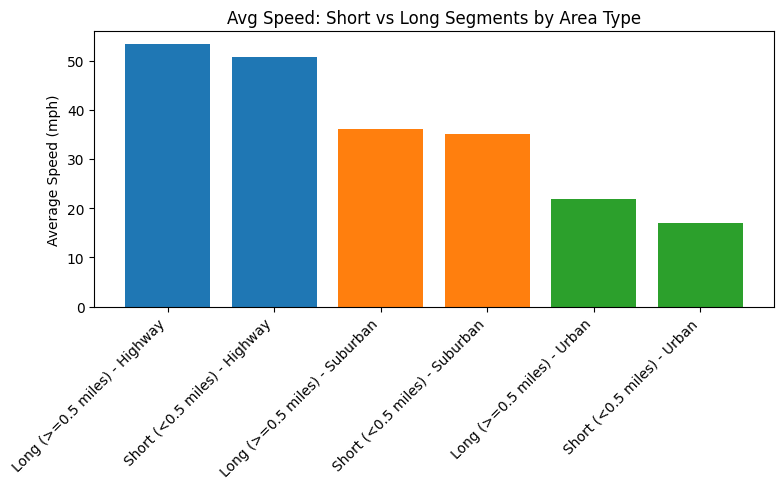

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Bar chart: avg speed by segment type grouped by area type
for area in df_segment_speed['area_type'].unique():
    subset = df_segment_speed[df_segment_speed['area_type'] == area]
    plt.bar(
        subset['segment_type'] + " - " + area,
        subset['avg_speed_mph']
    )

plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Speed (mph)")
plt.title("Avg Speed: Short vs Long Segments by Area Type")
plt.tight_layout()
plt.show()

### Insights: Are Shorter Segments Disproportionately Slower?

Yes — short segments (<0.5 miles) are consistently slower across all area types, even after controlling for urban/suburban/highway classifications.
Urban short segments show the biggest slowdown, averaging ~17 mph vs. ~22 mph for longer urban segments. Suburban and highway segments show a similar pattern, though less severe.

This indicates that signal density, frequent stops, turning movements, and intersection friction dominate performance on short links, making them disproportionately slower regardless of the surrounding area type.

# **5. Conclusion**

This analysis provides a clear picture of Austin’s mobility patterns by uncovering when and where congestion is most severe, how quickly corridors recover from peak slowdowns, and which types of road segments consistently underperform. Citywide results confirm that congestion intensifies during morning and evening peak hours, while segment-level findings show that short urban segments are disproportionately slower due to signal density and intersection friction. Directional asymmetries and slow-performing corridors further highlight where operational inefficiencies persist. The slower recovery times on key arterials underscore the need for focused traffic-flow interventions. Based on these insights, the final recommendations include prioritizing signal-timing optimization on high-friction urban segments, deploying dynamic routing strategies during peak hours, targeting infrastructure improvements on slow or slow-to-recover corridors, and expanding sensor coverage to strengthen data-driven mobility planning.Together, these findings capture the city’s congestion dynamics and provide a foundation for smarter, more efficient transportation strategies moving forward.


**6.Challanges**

Working with this dataset came with a few big hurdles before we could even start asking real traffic questions. First, we had to extract around 50,000 rows of data, and the TMF and TMSR tables don’t “line up nicely” they use different structures, units, timestamps, and formats. On top of that, more than 34 columns overlap across tables, which made it easy to get confused or accidentally join on the wrong fields. The data was also noisy: multiple timestamps for the same trip, inconsistent date/time formatting, and missing values all showed up and had to be dealt with. Because of all this, a big part of our work was not just writing queries, but carefully cleaning, standardizing, aligning, and merging the tables so any traffic patterns we report are actually trustworthy.

## **References**

Google Maps: https://www.google.com/maps
Socrata:https://dev.socrata.com/docs/datatypes/floating_timestamp.html#

Datacamp Modules: https://app.datacamp.com/learn/assignments

BA775-Fall 2025 Collab Notebooks: https://github.com/soltaniehha/Business-Analytics-Toolbox

Python Documentation: https://docs.python.org/3/

NumPy Documentation: https://numpy.org/doc/stable/user/index.html#user

pandas documentation: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

Matplotlib Main Documentation: https://matplotlib.org/stable/

Line Chart (pyplot.plot): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Scatter Plot (pyplot.scatter): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Bar Chart (pyplot.bar): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

Plot Types Overview: https://matplotlib.org/stable/plot_types/index.html

Ticker Utilities (LogLocator,
ScalarFormatter): https://matplotlib.org/stable/api/ticker_api.html

## **Gen AI Disclosure**

We used ChatGPT to assist in drafting and formatting content within the notebook. Specifically:

Markdown cells & narrative: ChatGPT helped write problem definitions, executive summary, interpretations, and explanations. All generated text was reviewed and edited for clarity, accuracy, and alignment with our findings.

Code assistance: ChatGPT was used to help format code professionally, suggest syntax improvements, and debug certain tasks, such as extracting a date-type variable from a floating timestamp.

Validation: All AI-generated content—both text and code—was tested and verified against the dataset. No AI-generated text or code was used unverified, and all data analysis, aggregations, and visualizations were created independently by the team.

We did not use AI to generate analyses, draw conclusions, or create visualizations. The tool was solely used to enhance readability, presentation, and efficiency.